In [1]:
file_path = ('/Users/ivynyayieka/Downloads/Coliform Folder/Coliform Violations - Coliform Violations.csv')

In [2]:
import pandas as pd
import pyproj
import geopandas as gpd
import shapely
import warnings
from shapely.errors import ShapelyDeprecationWarning
import matplotlib.pyplot as plt
# warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning) 


In [3]:
df = pd.read_csv ('/Users/ivynyayieka/Downloads/Coliform Folder/Coliform Violations - Coliform Violations.csv')

In [4]:
df.head()

,Sample Site,Coliform (Quanti-Tray) (MPN /100mL),X coordinate,Y coordinate
0,13550,>200.5,1008924,250942
1,1SCH3,>200.5,1013921,259223
2,40200,>200.5,1012206,222705
3,40650,>200.5,1018876,216530
4,50300,>200.5,955759,163383


In [5]:
gdf = gpd.GeoDataFrame(df, 
                       geometry=gpd.points_from_xy(df['X coordinate'],df['Y coordinate']), 
                       crs="epsg:2263")
print(gdf)

    Sample Site Coliform (Quanti-Tray) (MPN /100mL)  X coordinate  \
0         13550                              >200.5       1008924   
1         1SCH3                              >200.5       1013921   
2         40200                              >200.5       1012206   
3         40650                              >200.5       1018876   
4         50300                              >200.5        955759   
..          ...                                 ...           ...   
295       46450                                   1       1035671   
296       46950                                   1       1030452   
297       47150                                   1       1033893   
298       50200                                   1        960455   
299       50300                                   1        955759   

     Y coordinate                        geometry  
0          250942  POINT (1008924.000 250942.000)  
1          259223  POINT (1013921.000 259223.000)  
2          2227

In [6]:
gdf

,Sample Site,Coliform (Quanti-Tray) (MPN /100mL),X coordinate,Y coordinate,geometry
0,13550,>200.5,1008924,250942,POINT (1008924.000 250942.000)
1,1SCH3,>200.5,1013921,259223,POINT (1013921.000 259223.000)
2,40200,>200.5,1012206,222705,POINT (1012206.000 222705.000)
3,40650,>200.5,1018876,216530,POINT (1018876.000 216530.000)
4,50300,>200.5,955759,163383,POINT (955759.000 163383.000)
...,...,...,...,...,...
295,46450,1,1035671,218150,POINT (1035671.000 218150.000)
296,46950,1,1030452,196724,POINT (1030452.000 196724.000)
297,47150,1,1033893,228531,POINT (1033893.000 228531.000)
298,50200,1,960455,169298,POINT (960455.000 169298.000)


<AxesSubplot:>

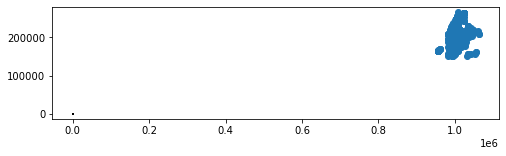

In [7]:
bouroughs = gpd.read_file('Borough Boundaries.geojson')
fig, ax = plt.subplots(1, figsize=(8, 8))
bouroughs.plot(ax=ax, color='white',edgecolor='black')
gdf.plot(ax=ax,)

In [8]:
gdf = gdf.to_crs(crs=4326)
gdf.head()

,Sample Site,Coliform (Quanti-Tray) (MPN /100mL),X coordinate,Y coordinate,geometry
0,13550,>200.5,1008924,250942,POINT (-73.91081 40.85542)
1,1SCH3,>200.5,1013921,259223,POINT (-73.89271 40.87813)
2,40200,>200.5,1012206,222705,POINT (-73.89906 40.77791)
3,40650,>200.5,1018876,216530,POINT (-73.87501 40.76093)
4,50300,>200.5,955759,163383,POINT (-74.10262 40.61508)


In [9]:
#gdf.plot(color='Coliform (Quanti-Tray) (MPN /100mL)') 

In [10]:
gdf.plot

In [11]:
gdf.columns
#Coliform (Quanti-Tray) (MPN /100mL)

Index(['Sample Site', 'Coliform (Quanti-Tray) (MPN /100mL)', 'X coordinate',
       'Y coordinate', 'geometry'],
      dtype='object')

In [12]:
gdf['lon'] = gdf['geometry'].x
gdf['lat'] = gdf['geometry'].y

In [13]:
gdf.head()

,Sample Site,Coliform (Quanti-Tray) (MPN /100mL),X coordinate,Y coordinate,geometry,lon,lat
0,13550,>200.5,1008924,250942,POINT (-73.91081 40.85542),-73.910806,40.855418
1,1SCH3,>200.5,1013921,259223,POINT (-73.89271 40.87813),-73.892706,40.878131
2,40200,>200.5,1012206,222705,POINT (-73.89906 40.77791),-73.899060,40.777905
3,40650,>200.5,1018876,216530,POINT (-73.87501 40.76093),-73.875009,40.760933
4,50300,>200.5,955759,163383,POINT (-74.10262 40.61508),-74.102621,40.615079


In [14]:
gdf.drop('geometry',axis=1).to_csv('ColiformLatLong.csv')

# 